# Immagini come liste di liste di pixel colorati (RGB)

In [1]:
import png

### Creazione di una nuova immagine

In [2]:
def create(w,h,color=(0,0,0)):
    img = []
    for _ in range(h):
        riga = []
        for _ in range(w):
            riga.append(color)
        img.append(riga)
    return img

In [3]:
rossa = create(4,6, (255,0,0))
rossa

[[(255, 0, 0), (255, 0, 0), (255, 0, 0), (255, 0, 0)],
 [(255, 0, 0), (255, 0, 0), (255, 0, 0), (255, 0, 0)],
 [(255, 0, 0), (255, 0, 0), (255, 0, 0), (255, 0, 0)],
 [(255, 0, 0), (255, 0, 0), (255, 0, 0), (255, 0, 0)],
 [(255, 0, 0), (255, 0, 0), (255, 0, 0), (255, 0, 0)],
 [(255, 0, 0), (255, 0, 0), (255, 0, 0), (255, 0, 0)]]

### Salvataggio in un file PNG

In [4]:
def save(img, filename):
    pngimg = png.from_array(img,'RGB')
    pngimg.save(filename)

In [5]:
save(rossa, 'rossa.png')
from IPython.display import Image
Image('rossa.png')

Esempio: creo una immagine 400x200 arancione

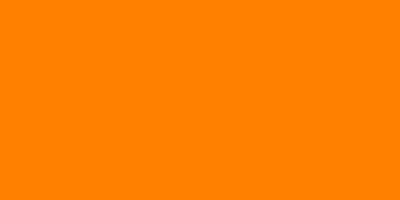

In [6]:
arancione = create(400, 200, (255, 128, 0) )
save(arancione, 'arancione.png')
Image('arancione.png')

### Funzioni di utilità

In [7]:
def heigth(img) : return len(img)
def width(img) : return len(img[0])
def inside(img, x, y):
    return 0 <= x < width(img) and 0 <= y < heigth(img)
inside(arancione, 100, 500)

False

### Disegnare un rettangolo sull'immagine

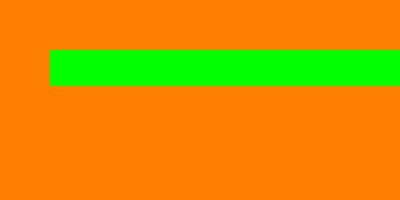

In [8]:
def draw_rect(img, x, y, w, h, color):
    for px in range(x, x+w):
        for py in range(y, y+h):
            try:
                img[py][px] = color
            except IndexError:
                pass
draw_rect(arancione, 50, 50, 700, 35, (0, 255, 0))
save(arancione, 'rettangolo_verde.png')
Image('rettangolo_verde.png')

### Caricare una immagine da file

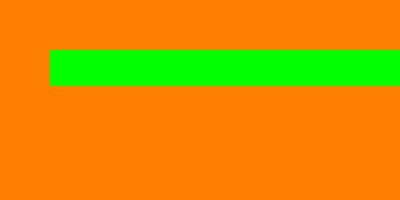

In [9]:
def load(filename):
    with open(filename, mode='rb') as f:
        reader = png.Reader(file=f)
        w, h, png_img, _ = reader.asRGB8()
        img = []
        for line in png_img:
            l = []
            for i in range(0, len(line), 3):
                l.append((line[i], line[i+1], line[i+2]))
            img.append(l)
        return img
rv = load('rettangolo_verde.png')
save(rv, 'rv.png')
Image('rv.png')

### Creazione di un gradiente orizzontale/verticale/generale

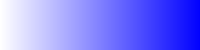

In [10]:
def gradienteH(w, h, c0, c1):
    img = create(w,h)
    for x in range(0, w):
        ratio = x/w
        cr = round(c0[0]*(1-ratio)+c1[0]*ratio)
        cg = round(c0[1]*(1-ratio)+c1[1]*ratio)
        cb = round(c0[2]*(1-ratio)+c1[2]*ratio)
        for y in range(0,h):
            img[y][x] = (cr, cg, cb)
    return img
redblue = gradienteH(200, 50, (255, 255, 255), (0, 0, 255))
save(redblue, 'redblue.png')
Image('redblue.png')

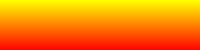

In [11]:
def gradienteV(w, h, c0, c1):
    img = create(w,h)
    for y in range(0, h):
        ratio = y/h
        cr = round(c0[0]*(1-ratio)+c1[0]*ratio)
        cg = round(c0[1]*(1-ratio)+c1[1]*ratio)
        cb = round(c0[2]*(1-ratio)+c1[2]*ratio)
        for x in range(0,w):
            img[y][x] = (cr, cg, cb)
    return img
laroma = gradienteV(200, 50, (255, 255, 0), (255, 0, 0))
save(laroma, 'laroma.png')
Image('laroma.png')

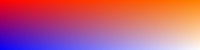

In [12]:
def gradienteHV(w, h, c00, c01, c10, c11):
    img = create(w,h)
    for y in range(0, h):
        for x in range(0,w):
            ratioy = y/h
            ratiox = x/w
            colore = []
            for c in range(3):
                interpolato = round(
                            c00[c]*(1-ratioy)*(1-ratiox) +
                            c01[c]*ratioy*(1-ratiox) +
                            c10[c]*(1-ratioy)*ratiox +
                            c11[c]*ratioy*ratiox)
                colore.append(interpolato)
            img[y][x] = tuple(colore)
    return img
rosso = (255, 0, 0)
verde = (0, 255, 0)
blu = (0, 0, 255)
nero = (0, 0, 0)
bianco = (255, 255, 255)
arancio = (255, 128, 0)
misto = gradienteHV(200, 50, rosso, blu, arancio, bianco)
save(misto, 'misto.png')
Image('misto.png')

### Copia di un segmento di immagine/creazione di una immagine bordata

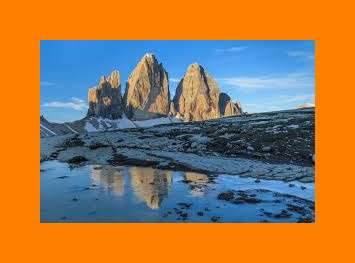

In [13]:
tre_cime = load('3cime.png')
Image('3cime.png')
def copia(sorgente, destinazione, x, y, w, h, x1, y1):
    for dx in range(w):
        for dy in range(h):
            xs = x + dx
            ys = y + dy
            xd = x1 + dx
            yd = y1 + dy
            if inside(sorgente, xs, ys) and inside(destinazione, xd, yd):
                destinazione[yd][xd] = sorgente[ys][xs]
def bordo(sorgente, l, colore):
    w = width(sorgente)
    h = heigth(sorgente)
    img = create(w+2*l, h+2*l, colore)
    copia(sorgente, img, 0, 0, w, h, l, l)
    return img

bordata = bordo(tre_cime, 40, arancio)
save(bordata, 'bordo.png')
Image('bordo.png')
                
                
            

### Esempio con bordo con gradiente

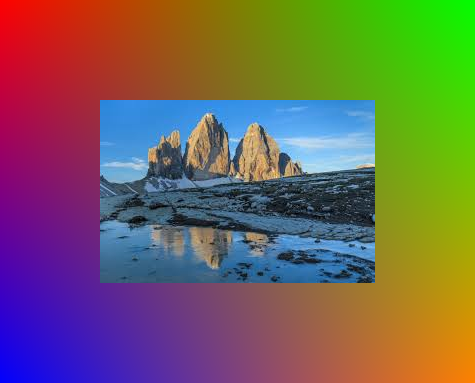

In [14]:
w = width(tre_cime)
h = heigth(tre_cime)
gra = gradienteHV(w+200, h+200, rosso, blu, verde, arancio)
copia(tre_cime, gra, 0, 0, w, h, 100, 100)
save(gra, 'gradiente-3cime.png')
Image('gradiente-3cime.png')

### Creazione di una scacchiera

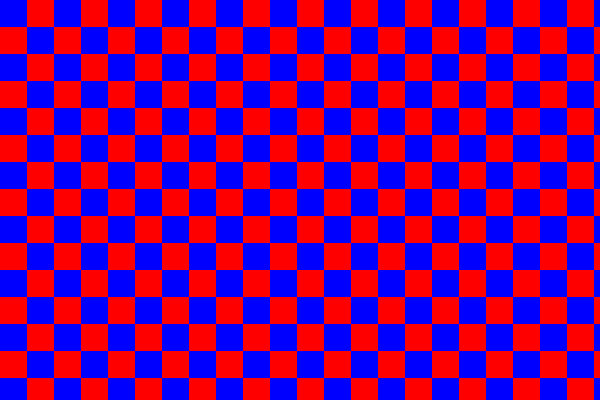

In [15]:
def scacchiera(w, h, l, c0, c1):
    img = create(w,h)
    nx = int(w/l)+1
    ny = int(h/l)+1
    for x in range(nx):
        for y in range(ny):
            colore = c0 if (x+y)%2 else c1
            draw_rect(img, x*l, y*l, l, l, colore)
    return img
sca = scacchiera(600, 400, 27, rosso, blu)
save(sca, 'scacchiera.png')
Image('scacchiera.png')

### Disegno di un cerchio pieno

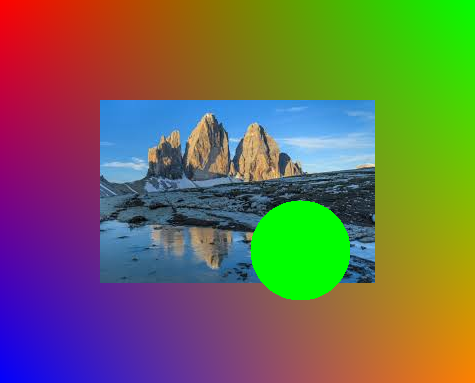

In [16]:
def draw_circle(img, xc, yc, r, colore):
    r2 = r*r
    w = width(img)
    h = heigth(img)
    for dx in range(-r, r):
        x = xc+dx
        for dy in range(-r, r):
            y = yc+dy
            if dx*dx+dy*dy <= r2:
                img[y][x] = colore
draw_circle(gra, 300, 250, 50, verde )
save(gra, 'cerchio.png')
Image('cerchio.png')

=======================================================

# Trasformazioni sulle foto

### Riflesso in orizzontale

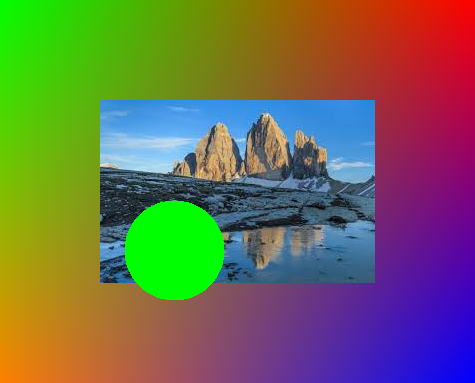

In [17]:
def flipH(img):
    h = heigth(img)
    w = width(img)
    nuova = create(w,h)
    for y in range(h):
        for x in range(w):
            xv = w-1-x
            nuova[y][x] = img[y][xv]
    return nuova
save(flipH(gra),'flipH.png')
Image('flipH.png')

### riflesso in verticale

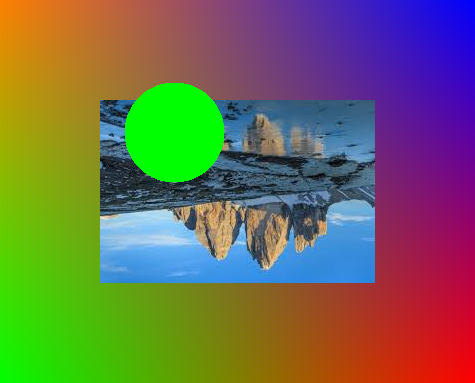

In [18]:
def flipV(img):
    h = heigth(img)
    w = width(img)
    nuova = create(w,h)
    for y in range(h):
        yv = h-1-y
        for x in range(w):
            nuova[y][x] = img[yv][x]
    return nuova
save(flipV(gra),'flipV.png')
Image('flipV.png')
save(flipH(flipV(gra)),'flipHV.png')
Image('flipHV.png')

### Rotazione antioraria di 90°

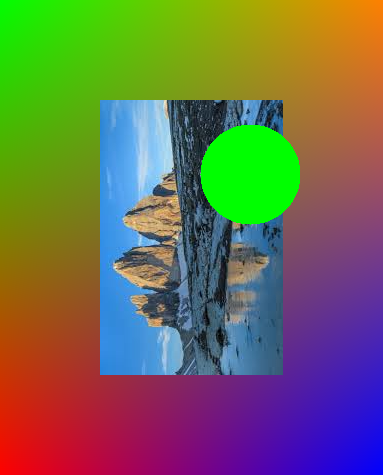

In [33]:
def ruota(img):
    w = heigth(img)
    h = width(img)
    nuova = create(w,h)
    for y in range(h):
        for x in range(w):
            nuova[y][x] = img[x][h-1-y]
    return nuova
save(ruota(gra),'ruotata.png')
Image('ruotata.png')

### Filtro che trasforma il colore di ciascun pixel (grigio e contrasto)

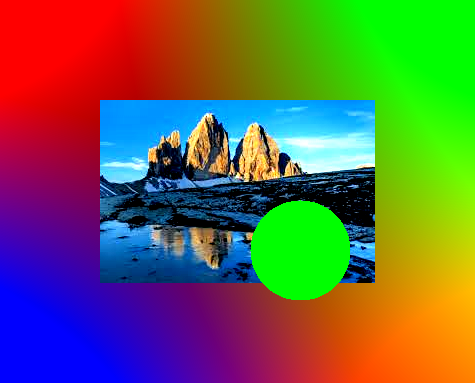

In [20]:
def filtro(img, funzione):
    h = heigth(img)
    w = width(img)
    nuova = create(w, h)
    for y in range(h):
        for x in range(w):
            nuova[y][x] = funzione(img[y][x])
    return nuova
def grigio(colore):
    r, g, b = colore
    media = (r+g+b)//3
    return media, media, media
def contrasto(colore):
    col = [0,0,0]
    for i in range(3):
        dc = colore[i] - 128
        nc = 128 + 2*dc
        nc = min(255, nc)
        nc = max(0, nc)
        col[i] = nc
    return col

# usando la list comprehension
def contrasto2(colore):
    return [max(0,min(255,128+2*(c-128))) for c in colore]


save(filtro(gra, grigio), '3cime-grigio.png')
Image('3cime-grigio.png')
save(filtro(gra, contrasto2), '3cime-contrasto.png')
Image('3cime-contrasto.png')
save(filtro(gra, lambda colore: tuple(max(0,min(255,128+2*(c-128))) for c in colore)), \
     '3cime-contrasto.png')
Image('3cime-contrasto.png')


### Mosaico che prende il colore dal pixel centrale del quadretto

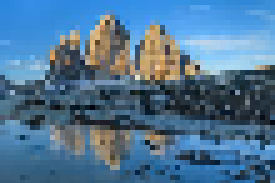

In [21]:
import math
def mosaico(img, l):
    h = heigth(img)
    w = width(img)
    nuova = create(w, h)
    nh = math.ceil(w/l)
    nv = math.ceil(h/l)
    for y in range(nv):
        for x in range(nh):
            xc = x*l + l//2
            yc = y*l + l//2
            if inside(img, xc, yc):
                colore = img[yc][xc]
                draw_rect(nuova, x*l, y*l, l, l, colore)
    return nuova
mosa = mosaico(tre_cime, 5)
save(mosa, 'mosaico.png')
Image('mosaico.png')

### Mosaico che prende il colore dalla media del quadretto

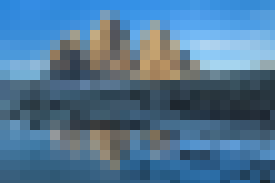

In [22]:
def mediaQuadretto(img, x, y, l):
    colore = [0,0,0]
    for c in range(3):
        numpixel = 0
        componente = 0
        for xr in range(x*l,(x+1)*l):
            for yr in range(y*l,(y+1)*l):
                if inside(img, xr, yr):
                    numpixel += 1
                    componente += img[yr][xr][c]
        if numpixel:
            colore[c] = componente//numpixel
    return colore
    
def mosaicoAverage(img, l):
    h = heigth(img)
    w = width(img)
    nuova = create(w, h)
    nh = math.ceil(w/l)
    nv = math.ceil(h/l)
    for y in range(nv):
        for x in range(nh):
            colore = mediaQuadretto(img, x, y, l)
            draw_rect(nuova, x*l, y*l, l, l, colore)
    return nuova
mosa = mosaicoAverage(tre_cime, 10)
save(mosa, 'mosaico_media.png')
Image('mosaico_media.png')

### Mosaico di quadretti bianchi proporzionali al'intensità media del quadretto

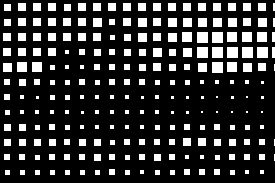

In [23]:
def mosaicoBW(img, l):
    h = heigth(img)
    w = width(img)
    nuova = create(w, h)
    nh = math.ceil(w/l)
    nv = math.ceil(h/l)
    for y in range(nv):
        for x in range(nh):
            colore = mediaQuadretto(img, x, y, l)
            livello = grigio(colore)[0]
            rapporto = livello/255
            lw = int(l*rapporto)
            d = (l-lw)//2            
            draw_rect(nuova, x*l+d, y*l+d, lw, lw, (255,255,255))
    return nuova
mosaBW = mosaicoBW(tre_cime, 15)
save(mosaBW, 'mosaico_BW.png')
Image('mosaico_BW.png')

# Immagini definite come classe (esempio d'uso)

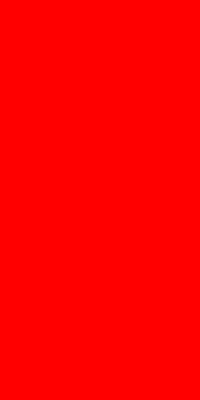

In [24]:
from Immagine import Immagine
rettangolo_ross = Immagine(200, 400, (255,0,0))
rettangolo_ross.save('rr.png')
Image('rr.png')

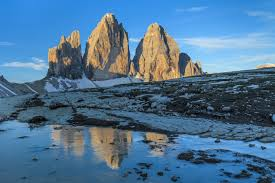

In [29]:
im = Immagine(10,10)
im.load('3cime.png')
im.save('tmp.png')
Image('tmp.png')